In [13]:
# scipy로 노이즈 제거하기
# https://www.geeksforgeeks.org/noise-removal-using-lowpass-digital-butterworth-filter-in-scipy-python/
# 실전에 어떻게 쓸지는 더 해봐야 알 듯;

# 라이브러리 불러오기
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [14]:
# 필터 파라미터 정의
f1 = 25  # Frequency of 1st signal
f2 = 50  # Frequency of 2nd signal
N = 10  # Order of the filter
  
# Generate the time vector of 1 sec duration
# 1초 동안의 벡터 생성(1초에 1000개)
t = np.linspace(0, 1, 1000)  # Generate 1000 samples in 1 sec
  
# Generate the signal containing f1 and f2
# f1과 f2를 포함하는 신호 생성
sig = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

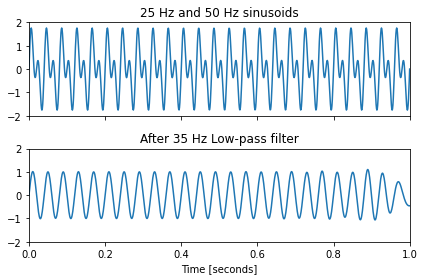

In [17]:
# 노이즈가 있는 원래 음성 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('25 Hz and 50 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

# Design the Butterworth filter using 
# signal.butter and output='sos'
sos = signal.butter(50, 35, 'lp', fs=1000, output='sos')

# 노이즈 제거 후 시각화

# Filter the signal by the filter using signal.sosfilt
# Use signal.sosfiltfilt to get output inphase with input
filtered = signal.sosfiltfilt(sos, sig)
  
# Display the output signal
ax2.plot(t, filtered)
ax2.set_title('After 35 Hz Low-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()